# FEATURE ENGINEERING AND MODEL SELECTION

1> Importing Dependencies

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

2> Importing the partially Cleaned Data from EDA notebook.

In [2]:
data= pd.read_excel("dummiesdata.xlsx")
data=data.drop('Unnamed: 0',axis=1)

data.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


3> Feature Selection

Removing unwanted features from the dataset.

In [3]:
data.drop(columns=['InternetService_Fiber optic','Contract_Month-to-month','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check',
'PhoneService_No','PhoneService_Yes','MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes','InternetService_DSL','StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No','StreamingMovies_No internet service',	'StreamingMovies_Yes','Contract_One year','Contract_Two year','PaperlessBilling_No','PaperlessBilling_Yes',
'InternetService_No',	'OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_No internet service','Partner_No','Partner_Yes','OnlineBackup_Yes','DeviceProtection_No',	'DeviceProtection_No internet service',	'DeviceProtection_Yes',	'TechSupport_No','TechSupport_No internet service',	'TechSupport_Yes','StreamingTV_No'], axis=1, inplace=True)

data.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Dependents_No,Dependents_Yes,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,0,0,0


Selected six Most important Features on the Basis of EDA and Visualization

5> Visualizing the corelation of all predictors with Churn.

<AxesSubplot:>

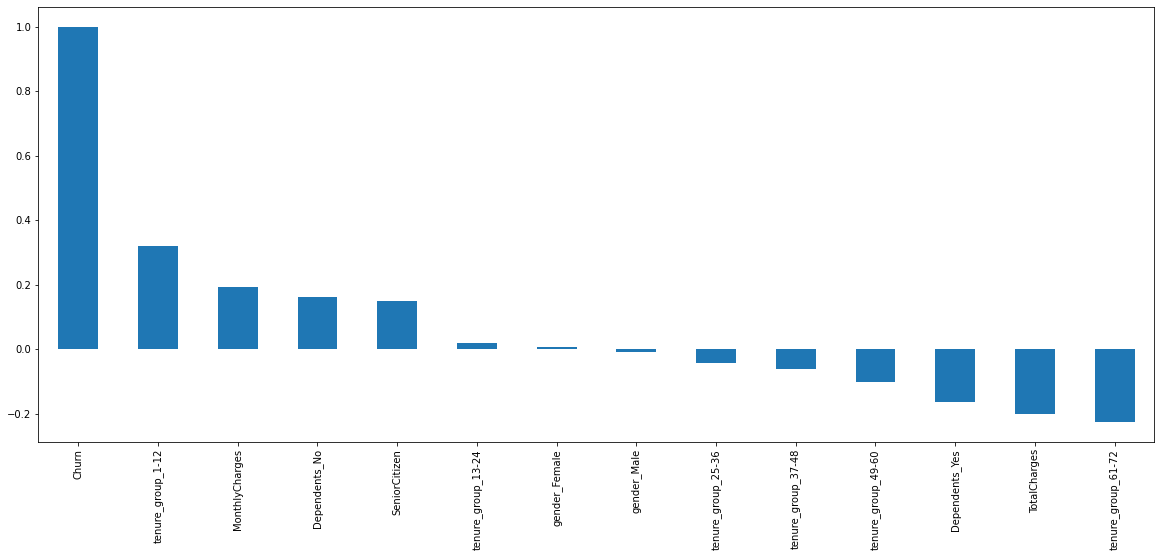

In [4]:
plt.figure(figsize=(20,8))

data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

6> Creating 'X' any 'Y' variable

'X'

In [5]:
x=data.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Dependents_No,Dependents_Yes,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,1,0,1,0,0,0,0,0


'Y'

In [6]:
y=data.Churn
y


0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

# Splitting the data into train and test sets

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# 1> DECISION TREE CLASSIFIER

In [8]:
model_d=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=6,min_samples_leaf=8)



In [9]:
model_d.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [10]:
y_pred=model_d.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
print(classification_report(y_test,y_pred,labels=(0,1)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1048
           1       0.57      0.43      0.49       359

    accuracy                           0.77      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.76      0.77      0.76      1407



In [12]:
print(confusion_matrix(y_test,y_pred))

[[932 116]
 [206 153]]


In [13]:
print('accuracy of the model is',metrics.accuracy_score(y_test,y_pred)*100)

accuracy of the model is 77.11442786069652


We can see that the Model's performance is not good for the dataset. One of the reasons could be the imbalance in the dataset.

To deal with such imbalance problem we will be using SMOTEENN which is an Oversampling Method to deal with imbalance datasets.

# Decision tree classifier Using SMOTEENN.

In [14]:
sm=SMOTEENN()

x_resampled,y_resampled= sm.fit_resample(x,y)

In [15]:
xz_train,xz_test,yz_train,yz_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [16]:
model_d_smote=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=6,min_samples_leaf=8)

In [17]:
model_d_smote.fit(xz_train,yz_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [18]:
y_pred=model_d_smote.predict(xz_test)


In [19]:
print(classification_report(yz_test,y_pred,labels=(0,1)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       525
           1       0.91      0.93      0.92       586

    accuracy                           0.91      1111
   macro avg       0.91      0.91      0.91      1111
weighted avg       0.91      0.91      0.91      1111



In [20]:
print(confusion_matrix(yz_test,y_pred))

[[470  55]
 [ 43 543]]


We can clearly see that the model is yeilding good results.

Now that the data se is balanced we can calculate the accuracy of the model

In [21]:
print('accuracy of the model is',metrics.accuracy_score(yz_test,y_pred)*100)



accuracy of the model is 91.17911791179118


# 2> RANDOM FOREST CLASSIFIER


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [24]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [25]:
y_pred=model_rf.predict(x_test)

In [26]:
model_rf.score(x_test,y_test)

0.7818052594171997

Again we will try to improve the score by Using SMOTEENN as the data set is imbalanced

In [27]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [28]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [29]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [30]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [31]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [32]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [33]:

print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       539
           1       0.91      0.94      0.93       579

    accuracy                           0.92      1118
   macro avg       0.92      0.92      0.92      1118
weighted avg       0.92      0.92      0.92      1118



Printing the accuracy of the model

In [34]:
print('accuracy of the model is',metrics.accuracy_score(yr_test1,yr_predict1)*100)


accuracy of the model is 92.21824686940965


# HYPER PARAMETER TUNING

PERFORMING PRINCIPAL COMPONENT ANALYSIS (PCA).

In [35]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [36]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [37]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [38]:
RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [39]:
yr_predict_pca = model.predict(xr_test_pca)

In [40]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [41]:

print(metrics.classification_report(yr_test1, yr_predict_pca))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66       539
           1       0.68      0.77      0.72       579

    accuracy                           0.70      1118
   macro avg       0.70      0.69      0.69      1118
weighted avg       0.70      0.70      0.69      1118



Printing the accuracy

In [42]:
print('accuracy of the model is',metrics.accuracy_score(yr_test1,yr_predict_pca)*100)


accuracy of the model is 69.58855098389982


 we couldn't see any better results, hence let's finalise the model which was created by Decision Tree Classifier, and save the model. 

# Saving the best suited model for further deployment.

In [43]:
import pickle


In [44]:
file_name= 'model.sav'

In [45]:
pickle.dump(model_rf_smote,open(file_name,'wb'))

Cross checking the model's performance

In [46]:
load_model=pickle.load(open(file_name,'rb'))

In [47]:
load_model.score(xz_test,yz_test)


0.9261926192619262

The Model is working perfectly.